In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Data Preprocessing
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop('Cabin', axis=1)

In [6]:
# Check after Preprocessing
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1864584620.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', ax=axes[0, 0], palette='Set1')
C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1864584620.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', ax=axes[0, 1], palette='Set2')
C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1864584620.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='muted')
C:\Users\jafie\AppData\Local\Temp\ipykernel_

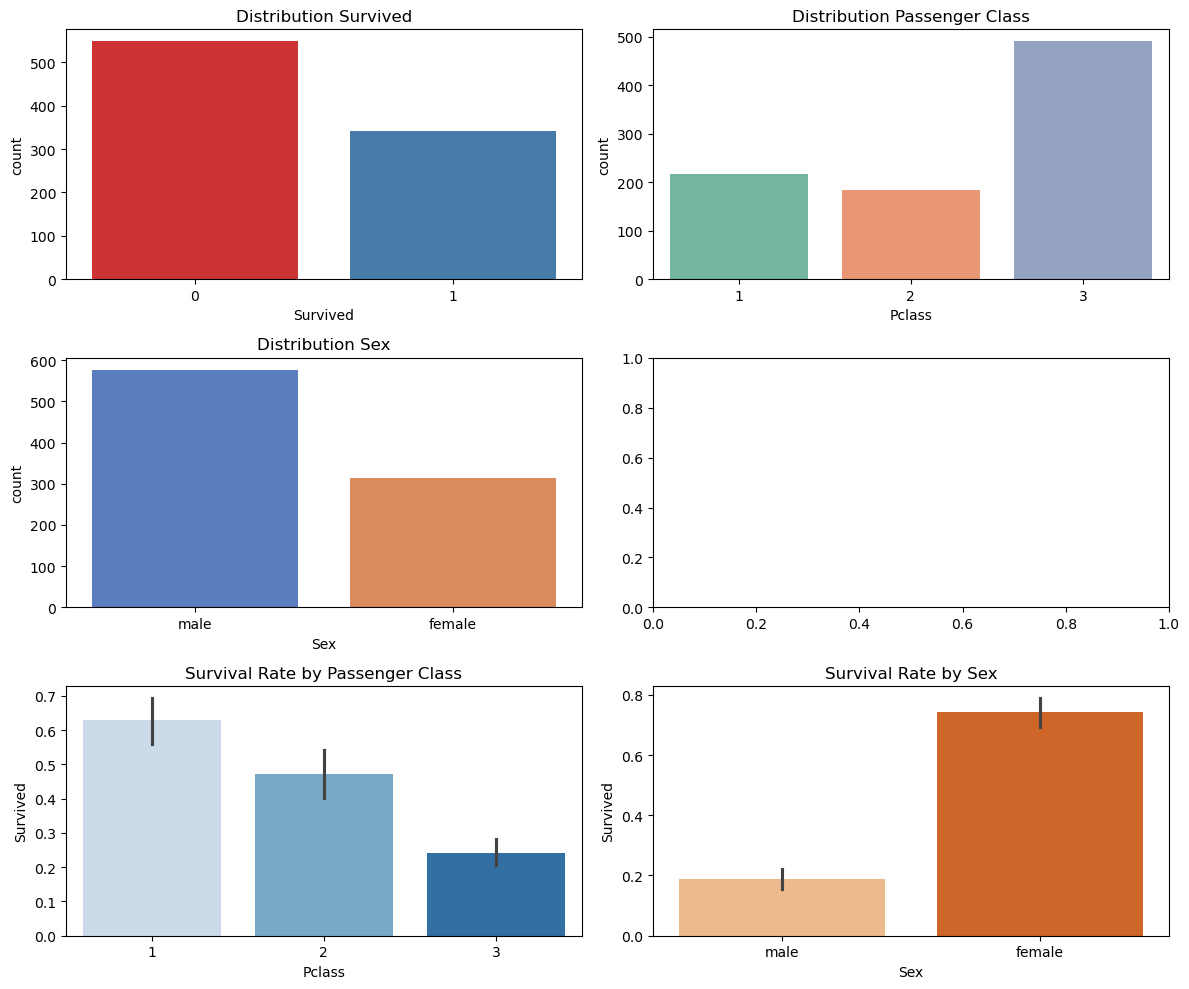

In [7]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan axes dengan layout 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Analysis Survived Column
sns.countplot(data=df, x='Survived', ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Distribution Survived')

# Analysis Pclass Column
sns.countplot(data=df, x='Pclass', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Distribution Passenger Class')

# Analysis Sex Column
sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Distribution Sex')

# Analysis Pclass Column
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[2, 0], palette='Blues')
axes[2, 0].set_title('Survival Rate by Passenger Class')

# Analysis Sex Column
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[2, 1], palette='Oranges')
axes[2, 1].set_title('Survival Rate by Sex')

plt.tight_layout()
plt.show()

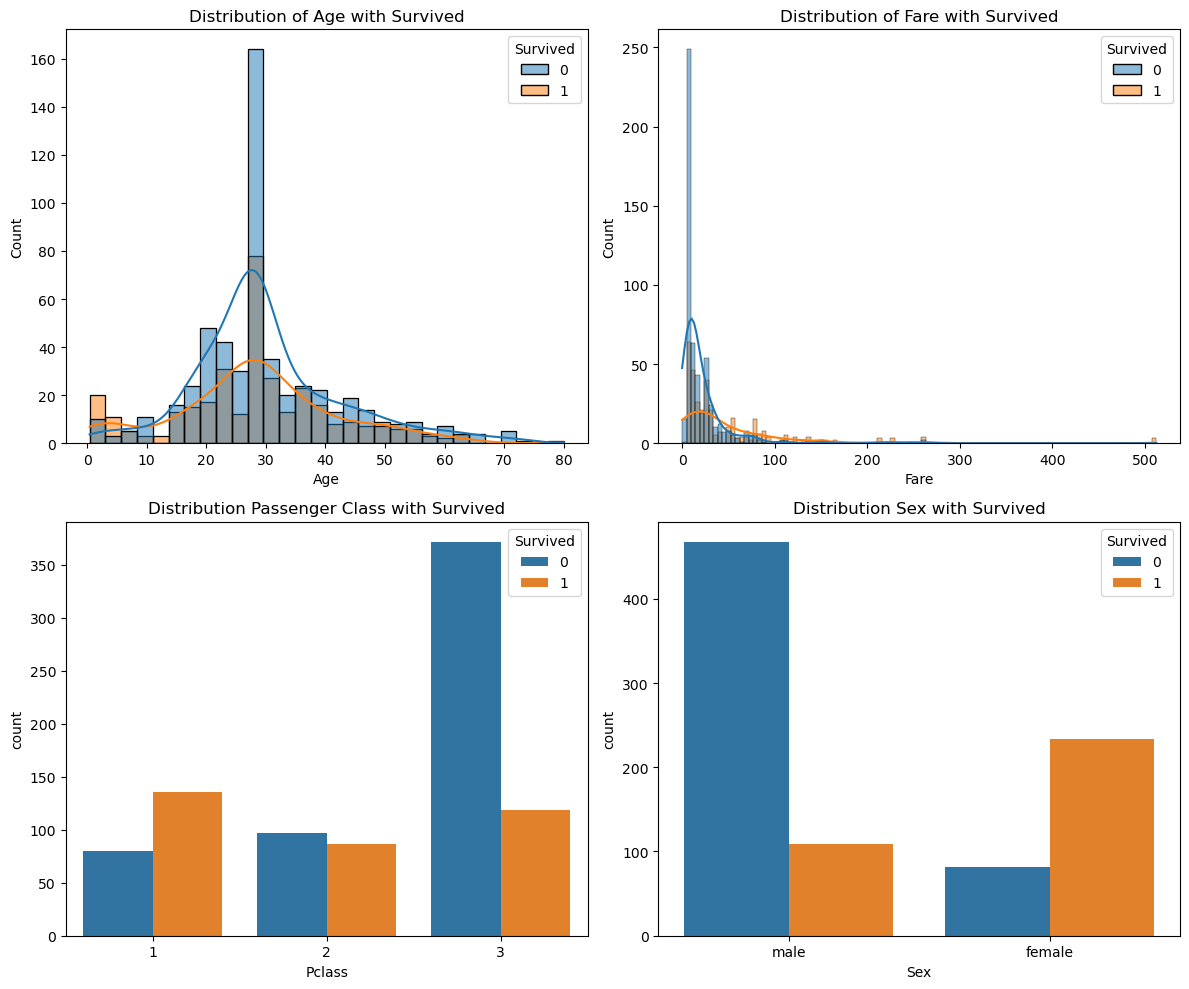

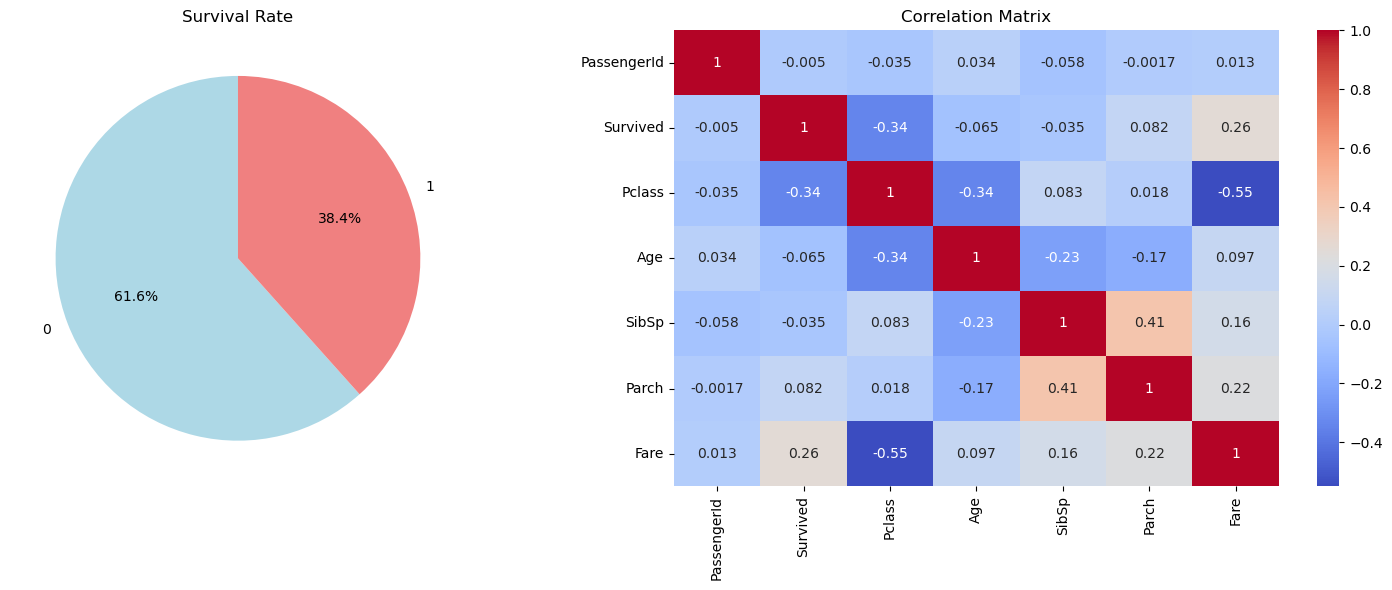

In [8]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dan axes dengan layout 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Analysis Age Column
sns.histplot(data=df, x='Age', hue='Survived', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age with Survived')

# Analysis Fare Column
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fare with Survived')

# Analysis Pclass Column
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Distribution Passenger Class with Survived')

# Analysis Sex Column
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Distribution Sex with Survived')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))  # Lebar figure lebih besar daripada tinggi untuk format 1 baris 2 kolom

# Pie Chart
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot pertama
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Survival Rate')
plt.ylabel('')  # Menghapus label default sumbu y

# Correlation Matrix
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot kedua
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()  # Menyusun layout agar elemen tidak saling bertumpuk
plt.show()

In [9]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # Mengubah data Kategorik menjadi Numerik
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1213116340.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AgeGroup', palette='Set1')
C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1213116340.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set1')


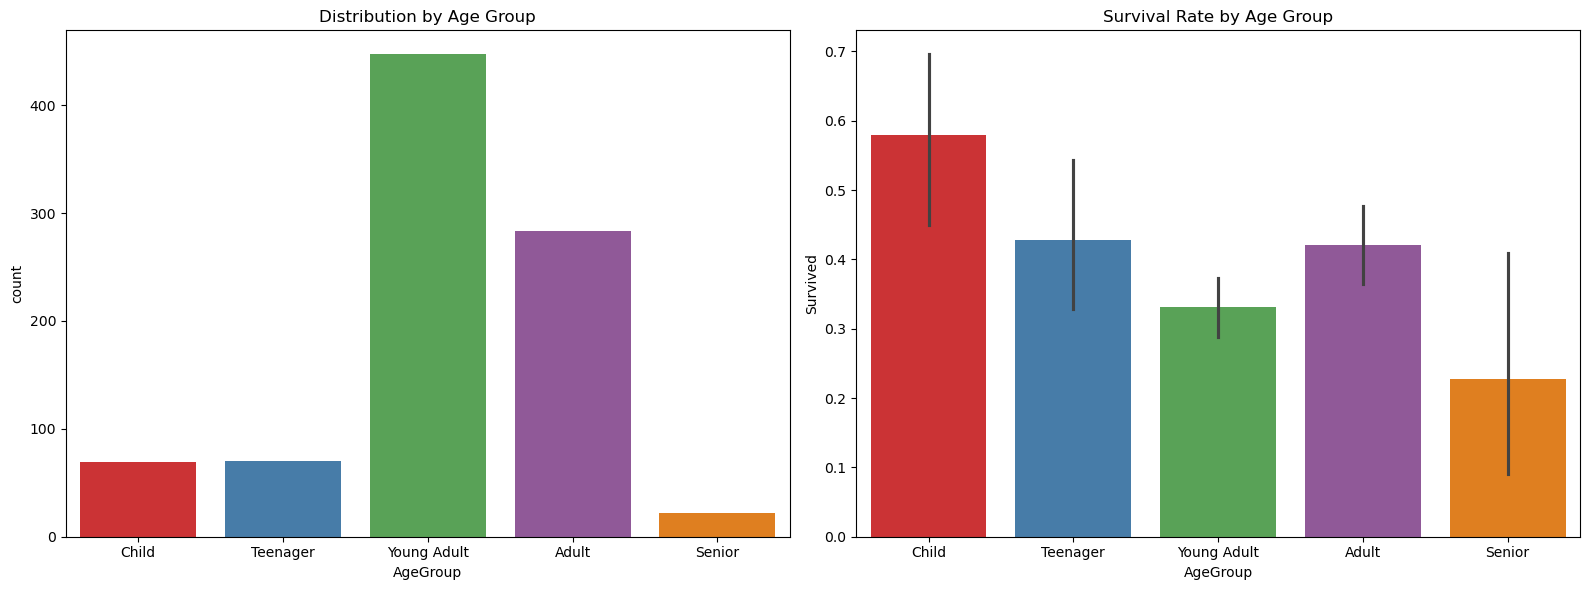

C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1213116340.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FareGroup', palette='Set2')
C:\Users\jafie\AppData\Local\Temp\ipykernel_64968\1213116340.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FareGroup', y='Survived', palette='Set2')


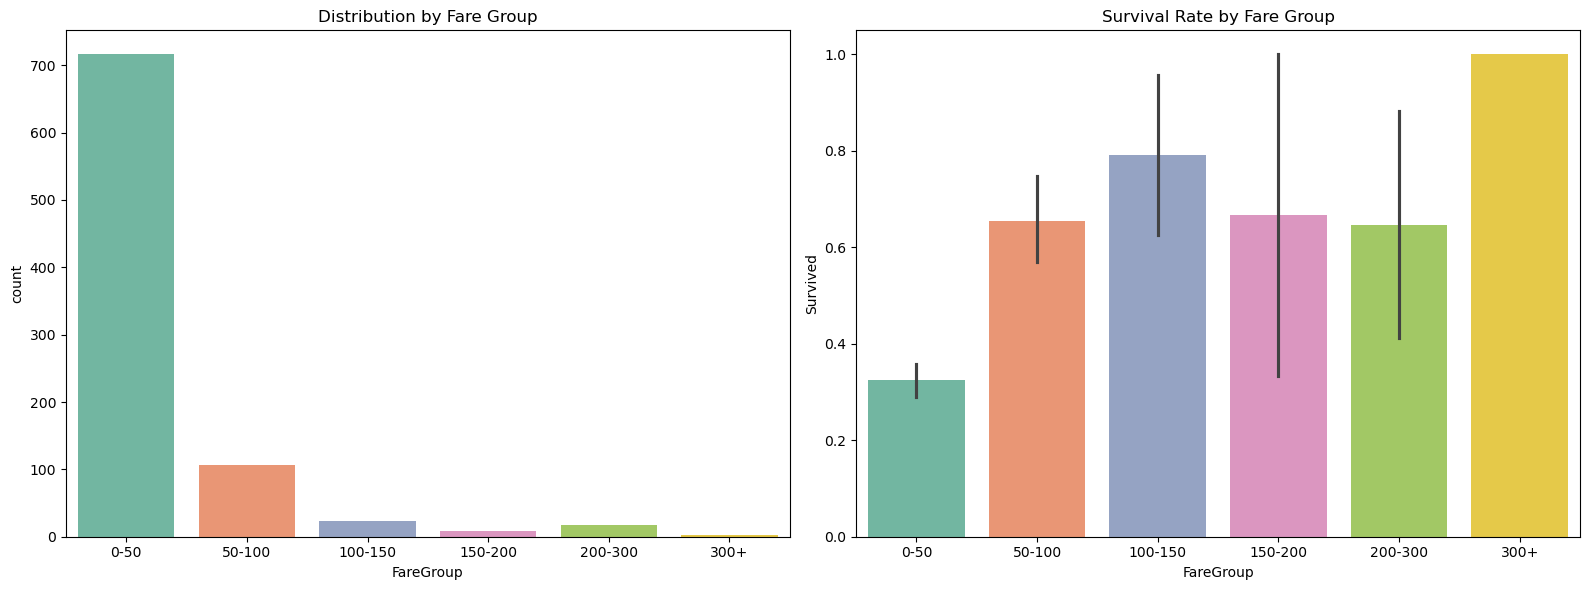

In [10]:
# Membagi Age menjadi kelompok umur
bins = [0, 12, 18, 30, 60, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Membagi Fare menjadi kelompok harga
fare_bins = [0, 50, 100, 150, 200, 300, 600]
fare_labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300+']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(data=df, x='AgeGroup', palette='Set1')
plt.title('Distribution by Age Group')

plt.subplot(1,2,2)
sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set1')
plt.title('Survival Rate by Age Group')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(data=df, x='FareGroup', palette='Set2')
plt.title('Distribution by Fare Group')

plt.subplot(1,2,2)
sns.barplot(data=df, x='FareGroup', y='Survived', palette='Set2')
plt.title('Survival Rate by Fare Group')

plt.tight_layout()
plt.show()

In [11]:
# Feature Selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [12]:
# Train Test Split, Memisahkan data untuk dilatih dan diuji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,1,28.0,2,0,23.2500,1
309,1,0,30.0,0,0,56.9292,0
516,2,0,34.0,0,0,10.5000,2
120,2,1,21.0,2,0,73.5000,2
570,2,1,62.0,0,0,10.5000,2
...,...,...,...,...,...,...,...
715,3,1,19.0,0,0,7.6500,2
767,3,0,30.5,0,0,7.7500,1
72,2,1,21.0,0,0,73.5000,2
235,3,0,28.0,0,0,7.5500,2


In [14]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
862,1,0,48.0,0,0,25.9292,2
223,3,1,28.0,0,0,7.8958,2
84,2,0,17.0,0,0,10.5000,2
680,3,0,28.0,0,0,8.1375,1
535,2,0,7.0,0,2,26.2500,2
...,...,...,...,...,...,...,...
796,1,0,49.0,0,0,25.9292,2
815,1,1,28.0,0,0,0.0000,2
629,3,1,28.0,0,0,7.7333,1
421,3,1,21.0,0,0,7.7333,1


In [15]:
y_train

301    1
309    1
516    1
120    0
570    1
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 712, dtype: int64

In [16]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [18]:
# Modeling with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
# Modeling with Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [20]:
# Modeling with XGBoost
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=1)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [21]:
# Modeling with K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
# Evaluation RFC
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predict Data Test using Built Random Forest Model
y_pred = model.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

df_comparison = pd.DataFrame({
    'Actual': y_test,
    'RFC_Pred': y_pred,
    'LR_Pred': y_pred_lr,
    'XGB_Pred': y_pred_xgb,
    'KNN_Pred': y_pred_knn,
})
df_comparison

,Actual,RFC_Pred,LR_Pred,XGB_Pred,KNN_Pred
862,1,1,1,1,1
223,0,0,0,0,0
84,1,1,1,1,0
680,0,1,1,1,1
535,1,1,1,1,1
...,...,...,...,...,...
796,1,1,1,1,1
815,0,0,1,0,0
629,0,0,0,0,0
421,0,0,0,0,0


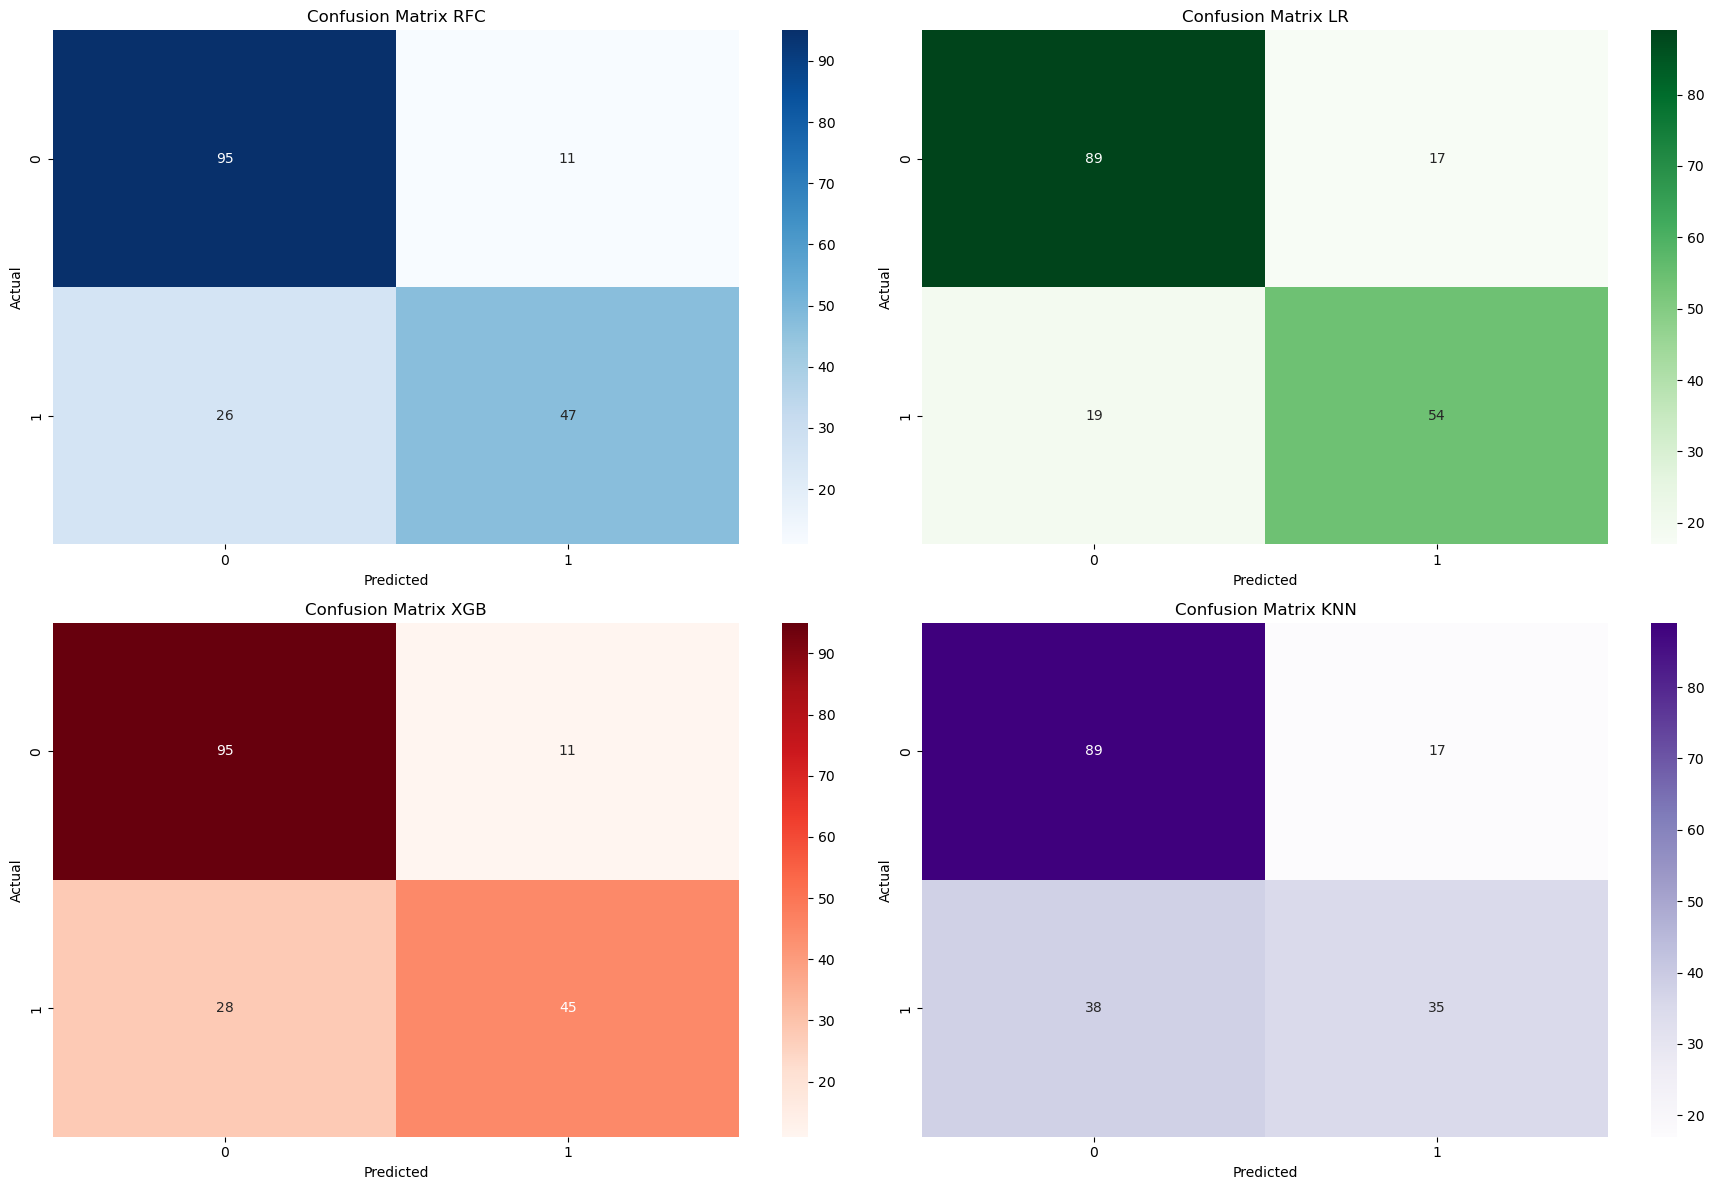

In [38]:
# Make Confusion Matrix using heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(18, 12))

# Plot pertama - Confusion Matrix RFC
plt.subplot(2, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RFC')

# Plot kedua - Confusion Matrix LR
plt.subplot(2, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LR')

# Plot kedua - Confusion Matrix XGB
plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ke-1
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGB')

# Plot kedua - Confusion Matrix KNN
plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot ke-1
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')

plt.tight_layout()
plt.show()

In [39]:
# Features Importances (Random Forest Only)
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.263622
5,Fare,0.261463
2,Age,0.256590
0,Pclass,0.090348
3,SibSp,0.052552
4,Parch,0.040127
6,Embarked,0.035298


In [40]:
# Evaluasi performa model
model_names = ['Random Forest Classifier', 'Logistic Regression', 'XGBoost', 'K-Nearest Neighbors']
performance = []

for y_pred, model_name in zip([y_pred, y_pred_lr, y_pred_xgb, y_pred_knn], model_names):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Simpan hasil performa ke dalam list
    performance.append([accuracy, precision, recall, f1, roc_auc])


Models Performances Comparison

+--------------------------+------------+-------------+----------+------------+-----------+
|                          |   Accuracy |   Precision |   Recall |   F1-Score |   ROC_AUC |
|--------------------------+------------+-------------+----------+------------+-----------|
| Random Forest Classifier |   0.793296 |    0.810345 | 0.643836 |   0.717557 |  0.770031 |
| Logistic Regression      |   0.798883 |    0.760563 | 0.739726 |   0.75     |  0.789674 |
| XGBoost                  |   0.782123 |    0.803571 | 0.616438 |   0.697674 |  0.756332 |
| K-Nearest Neighbors      |   0.692737 |    0.673077 | 0.479452 |   0.56     |  0.659537 |
+--------------------------+------------+-------------+----------+------------+-----------+



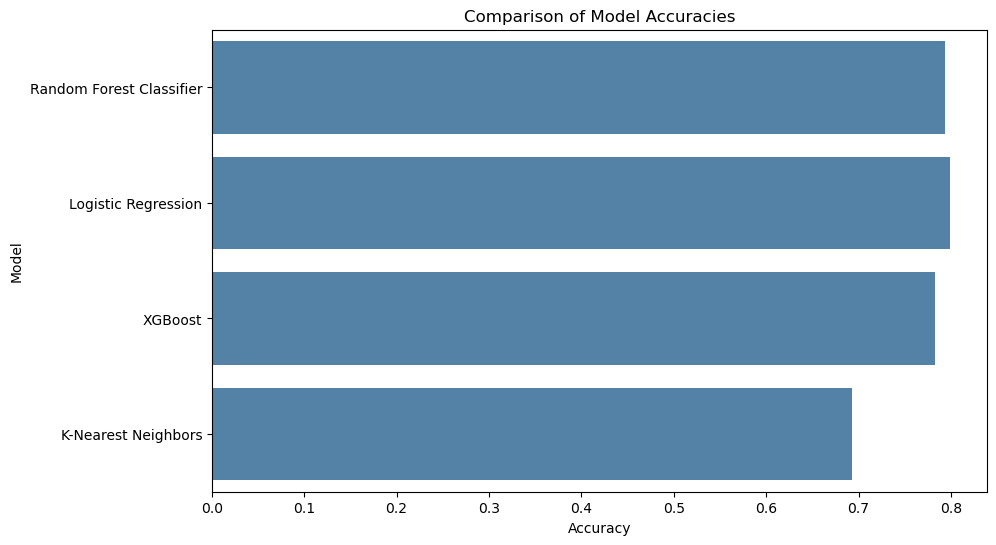

In [49]:
# Simpan data ke DataFrame untuk digunakan nanti
performance_df = pd.DataFrame(performance, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC_AUC'], index=model_names)

# Print model performance table
from tabulate import tabulate
print(f'\nModels Performances Comparison\n')
print(tabulate(performance_df, headers='keys', tablefmt='psql'))
print()

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df['Accuracy'], y=performance_df.index, color='steelblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.show()

# NOTE: hasil bisa berubah - ubah berdasarkan urutan melakukan data preprocessingnya/jika dijalankan berulang - ulang kali